# Lets do some modeling!

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import itertools
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [24]:
df = pd.read_csv('most_cleaned_data.csv', index_col=0)

In [8]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET',
       'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE',
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE',
       'SALE_SEASON', 'zip_mean', 'above_mean', 'year'],
      dtype='object')

In [25]:
df.drop(['BOROUGH','NEIGHBORHOOD','BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'ADDRESS', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'YEAR_BUILT', 
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE',
       'zip_mean'], axis=1, inplace=True)

In [26]:
print('Target Variable')
print(df.groupby(['above_mean']).above_mean.count())

Target Variable
above_mean
0    11163
1     4267
Name: above_mean, dtype: int64


In [27]:
df = pd.get_dummies(df, columns=['SALE_SEASON','ZIP_CODE', 'APARTMENT_NUMBER', 'TAX_CLASS_AT_TIME_OF_SALE', 'year'], drop_first=True)

In [29]:
df.sample(20)

,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,above_mean,SALE_SEASON_2,SALE_SEASON_3,SALE_SEASON_4,ZIP_CODE_11203,ZIP_CODE_11204,ZIP_CODE_11205,ZIP_CODE_11206,...,APARTMENT_NUMBER_3,TAX_CLASS_AT_TIME_OF_SALE_2,TAX_CLASS_AT_TIME_OF_SALE_3,TAX_CLASS_AT_TIME_OF_SALE_4,"year_(1901.0, 1920.0]","year_(1921.0, 1940.0]","year_(1941.0, 1960.0]","year_(1961.0, 1980.0]","year_(1981.0, 2000.0]","year_(2001.0, 2016.0]"
16540,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11803,2333,1748,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1967,1764,3260,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17208,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
289,6452,1836,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
10167,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19927,6000,2951,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3311,3500,2144,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8304,1153,504,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [5]:
# categorical:'year', 'SALE_SEASON', 'ZIP_CODE', 'APARTMENT_NUMBER', 'TAX_CLASS_AT_TIME_OF_SALE'
# continuous: 
outcome = ['above_mean']
predictors = ['year', 'SALE_SEASON', 'ZIP_CODE', 'APARTMENT_NUMBER', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET','TAX_CLASS_AT_TIME_OF_SALE']

In [30]:
# Create matrix of features
X = df.drop('above_mean', axis = 1) # grabs everything else but target

# Create target variable
y = df['above_mean'] # y is the column we're trying to predict

# Create a list of the features being used in the 
feature_cols = X.columns

In [31]:
feature_cols

Index(['LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'SALE_SEASON_2',
       'SALE_SEASON_3', 'SALE_SEASON_4', 'ZIP_CODE_11203', 'ZIP_CODE_11204',
       'ZIP_CODE_11205', 'ZIP_CODE_11206', 'ZIP_CODE_11207', 'ZIP_CODE_11208',
       'ZIP_CODE_11209', 'ZIP_CODE_11210', 'ZIP_CODE_11211', 'ZIP_CODE_11212',
       'ZIP_CODE_11213', 'ZIP_CODE_11214', 'ZIP_CODE_11215', 'ZIP_CODE_11216',
       'ZIP_CODE_11217', 'ZIP_CODE_11218', 'ZIP_CODE_11219', 'ZIP_CODE_11220',
       'ZIP_CODE_11221', 'ZIP_CODE_11222', 'ZIP_CODE_11223', 'ZIP_CODE_11224',
       'ZIP_CODE_11225', 'ZIP_CODE_11226', 'ZIP_CODE_11227', 'ZIP_CODE_11228',
       'ZIP_CODE_11229', 'ZIP_CODE_11230', 'ZIP_CODE_11231', 'ZIP_CODE_11232',
       'ZIP_CODE_11233', 'ZIP_CODE_11234', 'ZIP_CODE_11235', 'ZIP_CODE_11236',
       'ZIP_CODE_11237', 'ZIP_CODE_11238', 'ZIP_CODE_11239', 'ZIP_CODE_11249',
       'APARTMENT_NUMBER_1', 'APARTMENT_NUMBER_3',
       'TAX_CLASS_AT_TIME_OF_SALE_2', 'TAX_CLASS_AT_TIME_OF_SALE_3',
       'TAX_CLASS_AT_TIME_O

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))
dictionary

{'LAND_SQUARE_FEET': 0.0002665316959834184,
 'GROSS_SQUARE_FEET': 0.0003770251501149552,
 'SALE_SEASON_2': -0.25469564439228276,
 'SALE_SEASON_3': -0.192539251306281,
 'SALE_SEASON_4': -0.04647127908888864,
 'ZIP_CODE_11203': -0.38446469406446604,
 'ZIP_CODE_11204': 0.09857043260109435,
 'ZIP_CODE_11205': -0.03289360630563412,
 'ZIP_CODE_11206': -0.3305908152569257,
 'ZIP_CODE_11207': -0.22338620169061305,
 'ZIP_CODE_11208': -0.4733317680479047,
 'ZIP_CODE_11209': 0.5197032023410855,
 'ZIP_CODE_11210': -0.29027982309326683,
 'ZIP_CODE_11211': -0.1441601178898754,
 'ZIP_CODE_11212': -0.452515777403462,
 'ZIP_CODE_11213': -0.334905371836628,
 'ZIP_CODE_11214': 0.1651071267934774,
 'ZIP_CODE_11215': 0.20879959675611262,
 'ZIP_CODE_11216': 0.009165637170308783,
 'ZIP_CODE_11217': 0.04079290439820198,
 'ZIP_CODE_11218': -0.01460181752825704,
 'ZIP_CODE_11219': 0.16492286767317624,
 'ZIP_CODE_11220': -0.04634128878571651,
 'ZIP_CODE_11221': 0.2620343074958611,
 'ZIP_CODE_11222': -0.072347333

In [35]:
y_pred = logreg.predict(X_test)

The simplest metric we can use to evaluate our model is accuracy.

**Classification Accuracy:** Overall, how often is the classifier correct?

In [37]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7974724562540505


In [39]:
#check null accuracy - how often would it be right if it always guessed yes
max(y_test.mean(), 1 - y_test.mean())

0.7333117303953338

### Ok, so that's not great

In [38]:
print(metrics.confusion_matrix(y_test, y_pred))

[[2172   91]
 [ 534  289]]


In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
classes = ['Below Average', 'Above Average']

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[2172   91]
 [ 534  289]]


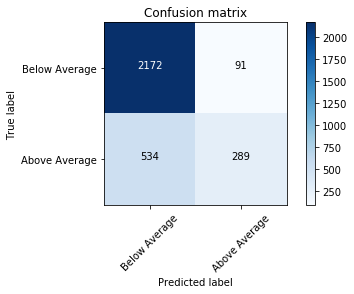

In [54]:
# positive = above average
# negative = below average
plot_confusion_matrix(cm, classes)

## Precision
When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [48]:
# check the precision
print(metrics.precision_score(y_test, y_pred))

0.7605263157894737


## Recall (Sensitivity)

What proportion of actual positives was identified correctly?

In [49]:
print(metrics.recall_score(y_test, y_pred))

0.3511543134872418


## F1 score 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

In [51]:
2*(metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred))/(metrics.precision_score(y_test, y_pred)+metrics.recall_score(y_test, y_pred))

0.48046550290939327

# I need to 'SMOTE' my classes (too uneven)

In [63]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_resample(X, y)
clf_smote = LinearSVC().fit(X_sm, y_sm)
# plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=1)

In [66]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [67]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7778772951186744


In [68]:
#check null accuracy - how often would it be right if it always guessed yes
max(y_test.mean(), 1 - y_test.mean())

0.5098522167487685

Confusion Matrix, without normalization
[[1601  676]
 [ 316 1873]]


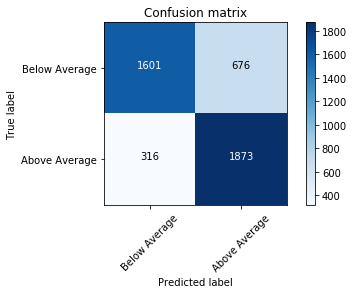

In [70]:
# print(metrics.confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
classes = ['Below Average', 'Above Average']
plot_confusion_matrix(cm, classes)

In [72]:
print('F1 Score:')
2*(metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred))/(metrics.precision_score(y_test, y_pred)+metrics.recall_score(y_test, y_pred))

F1 Score:


0.7906289573659772

## Ok, KNN now?

In [74]:
knn = KNeighborsClassifier(n_neighbors=1000)

In [75]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1000, p=2,
                     weights='uniform')

In [76]:
y_pred = knn.predict(X_test)